# Part A: Exploratory Data Analysis

## I Properties of the dataset

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
from IPython.core.pylabtools import figsize
# Scipy helper functions
import scipy
from scipy.stats import percentileofscore
from scipy import stats

In [2]:
# Load the dataset
data = pd.read_csv("world-university-rankings-2023.csv")

In [3]:
# Check data shape
data.shape

(2341, 13)

In [4]:
# Display the first few rows of the dataset
data.head()

from IPython.display import display, Markdown

# Display the title centered
display(Markdown('<h4 style="text-align:center;"> Figure 1: Top 5 Rows of the Dataset</h2>'))

# Display the first few rows of the dataset as a table
display(data.head())

<h4 style="text-align:center;"> Figure 1: Top 5 Rows of the Dataset</h2>

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48:52:00,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50:50:00,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46:54:00,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [5]:
# Display the data types of each column
print(data.dtypes)

University Rank                 object
Name of University              object
Location                        object
No of student                   object
No of student per staff        float64
International Student           object
Female:Male Ratio               object
OverAll Score                   object
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object


In [6]:
from tabulate import tabulate
from IPython.display import Markdown, display

# Create a dictionary with column names and their data types
data_types_dict = dict(data.dtypes)

# Convert the dictionary to a list of tuples
data_types_list = list(data_types_dict.items())

# Display the title centered
display(Markdown('<h4 style="text-align:  left;">      Figure 2: Column Types of the Dataset</h2>'))

# Display the table using tabulate
table = tabulate(data_types_list, headers=['Column Name', 'Data Type'], tablefmt='fancy_grid')
print(table)

<h4 style="text-align:  left;">      Figure 2: Column Types of the Dataset</h2>

╒═════════════════════════════╤═════════════╕
│ Column Name                 │ Data Type   │
╞═════════════════════════════╪═════════════╡
│ University Rank             │ object      │
├─────────────────────────────┼─────────────┤
│ Name of University          │ object      │
├─────────────────────────────┼─────────────┤
│ Location                    │ object      │
├─────────────────────────────┼─────────────┤
│ No of student               │ object      │
├─────────────────────────────┼─────────────┤
│ No of student per staff     │ float64     │
├─────────────────────────────┼─────────────┤
│ International Student       │ object      │
├─────────────────────────────┼─────────────┤
│ Female:Male Ratio           │ object      │
├─────────────────────────────┼─────────────┤
│ OverAll Score               │ object      │
├─────────────────────────────┼─────────────┤
│ Teaching Score              │ float64     │
├─────────────────────────────┼─────────────┤
│ Research Score              │ fl

## II Anomalies of the dataset

Missing Values:
 University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64


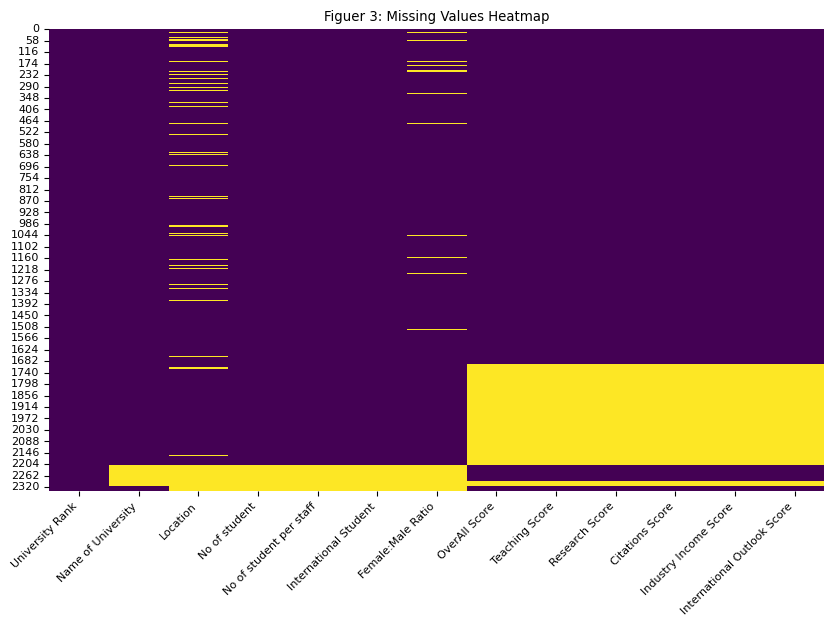

In [7]:
import pandas as pd

# Assuming 'data' is your DataFrame
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Figuer 3: Missing Values Heatmap')
plt.show()

In [8]:
# remove missing values
data=data.dropna()
data.shape

(1488, 13)

In [9]:
# change the datatype of the "No of Student"
data['No of student'] = data['No of student'].str.replace(',', '').astype(int) 

# change the datatype of the "International Student"
data['International Student'] = data['International Student'].str.replace('%', ' ')
data['International Student'] = pd.to_numeric(data['International Student'], errors='coerce')
data['International Student']=  data['International Student']/100

In [10]:
import pandas as pd

# change the datatype of the "University Rank"
try:
    data['University Rank'] = data['University Rank'].astype(int)
except ValueError as e:
    print(f"Error: {e}")
    print("Printing values causing the error:")
    problematic_values = data.loc[~data['University Rank'].astype(str).str.isdigit(), 'University Rank']
    print(problematic_values)

Error: invalid literal for int() with base 10: '201–250'
Printing values causing the error:
199     201–250
200     201–250
201     201–250
202     201–250
204     201–250
         ...   
1692      1501+
1693      1501+
1694      1501+
1695      1501+
1696      1501+
Name: University Rank, Length: 1352, dtype: object


In [11]:
import pandas as pd

# change the datatype of the "OverAll Score"
try:
    data['OverAll Score'] = data['OverAll Score'].astype(int)
except ValueError as e:
    print(f"Error: {e}")
    print("Printing values causing the error:")
    problematic_values = data.loc[~data['University Rank'].astype(str).str.isdigit(), 'University Rank']
    print(problematic_values)

Error: invalid literal for int() with base 10: '96.4'
Printing values causing the error:
199     201–250
200     201–250
201     201–250
202     201–250
204     201–250
         ...   
1692      1501+
1693      1501+
1694      1501+
1695      1501+
1696      1501+
Name: University Rank, Length: 1352, dtype: object


In [12]:
# Display the title centered
display(Markdown('<h4 style="text-align:center;"> Figure 4: Rows 200-205 of the Dataset</h2>'))

# Display the first few rows of the dataset as a table
display(data.iloc[199:204, :])

<h4 style="text-align:center;"> Figure 4: Rows 200-205 of the Dataset</h2>

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
286,251–300,University of Sharjah,United Arab Emirates,12933,19.2,0.55,67:33:00,48.9–51.1,20.5,21.3,96.8,41.4,99.3
288,251–300,University of Southern Denmark,Denmark,18471,10.2,0.14,53:47:00,48.9–51.1,24.7,32.4,85.3,72.3,78.9
290,251–300,Sun Yat-sen University,China,57951,15.1,0.05,49:51:00,48.9–51.1,44.9,37.4,74.8,59.3,31.3
291,251–300,Swansea University,United Kingdom,17490,15.4,0.22,47:53:00,48.9–51.1,24.9,28.2,91.5,39.3,83.6
293,251–300,Tongji University,China,30153,10.8,0.12,46:54:00,48.9–51.1,43.4,52.3,46.1,97.8,53.1


In [13]:
# Assuming your DataFrame is named 'data_valid'

# Convert 'University Rank' to numeric, replace non-numeric values with NaN
data['University Rank'] = pd.to_numeric(data['University Rank'], errors='coerce')

# Keep rows where 'University Rank' is less than 199
data_valid = data[data['University Rank'] < 199]

# Display the first few rows of the updated dataset
display(data_valid.head())

# Display the last few rows of the updated dataset
display(data_valid.tail())

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1.0,University of Oxford,United Kingdom,20965,10.6,0.42,48:52:00,96.4,92.3,99.7,99.0,74.9,96.2
1,2.0,Harvard University,United States,21887,9.6,0.25,50:50:00,95.2,94.8,99.0,99.3,49.5,80.5
2,3.0,University of Cambridge,United Kingdom,20185,11.3,0.39,47:53:00,94.8,90.9,99.5,97.0,54.2,95.8
3,3.0,Stanford University,United States,16164,7.1,0.24,46:54:00,94.8,94.2,96.7,99.8,65.0,79.8
4,5.0,Massachusetts Institute of Technology,United States,11415,8.2,0.33,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
192,194.0,Medical University of Vienna,Austria,7274,8.4,0.33,50:50:00,54.6,35.0,27.6,94.0,61.2,81.7
193,194.0,University of Miami,United States,17009,10.8,0.16,53:47:00,54.6,48.4,33.5,81.0,48.3,60.2
194,196.0,University of Erlangen-Nuremberg,Germany,30303,43.4,0.13,51:49:00,54.5,44.6,47.5,68.8,90.7,53.5
196,198.0,Durham University,United Kingdom,18425,14.1,0.35,54:46:00,54.4,40.0,44.6,70.0,39.4,94.3
198,198.0,University of Reading,United Kingdom,15720,16.4,0.32,56:44:00,54.4,36.5,39.6,78.5,42.2,93.3


In [14]:
# Check the new data types 'data_valid'
print(data_valid.dtypes)

University Rank                float64
Name of University              object
Location                        object
No of student                    int32
No of student per staff        float64
International Student          float64
Female:Male Ratio               object
OverAll Score                   object
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object


In [15]:
# Create a copy of the DataFrame
data_valid = data_valid.copy()

# Change the datatype of the "OverAll Score" column to float
data_valid.loc[:, 'OverAll Score'] = data_valid['OverAll Score'].astype(float)

C:\Users\86188\AppData\Local\Temp\ipykernel_23928\3979162172.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_valid.loc[:, 'OverAll Score'] = data_valid['OverAll Score'].astype(float)


In [16]:
# Check the new data types 'data_valid'
print(data_valid.dtypes)

University Rank                float64
Name of University              object
Location                        object
No of student                    int32
No of student per staff        float64
International Student          float64
Female:Male Ratio               object
OverAll Score                  float64
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object


## III Patterns of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 198
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              136 non-null    float64
 1   Name of University           136 non-null    object 
 2   Location                     136 non-null    object 
 3   No of student                136 non-null    int32  
 4   No of student per staff      136 non-null    float64
 5   International Student        136 non-null    float64
 6   Female:Male Ratio            136 non-null    object 
 7   OverAll Score                136 non-null    float64
 8   Teaching Score               136 non-null    float64
 9   Research Score               136 non-null    float64
 10  Citations Score              136 non-null    float64
 11  Industry Income Score        136 non-null    float64
 12  International Outlook Score  136 non-null    float64
dtypes: float64(9), int32

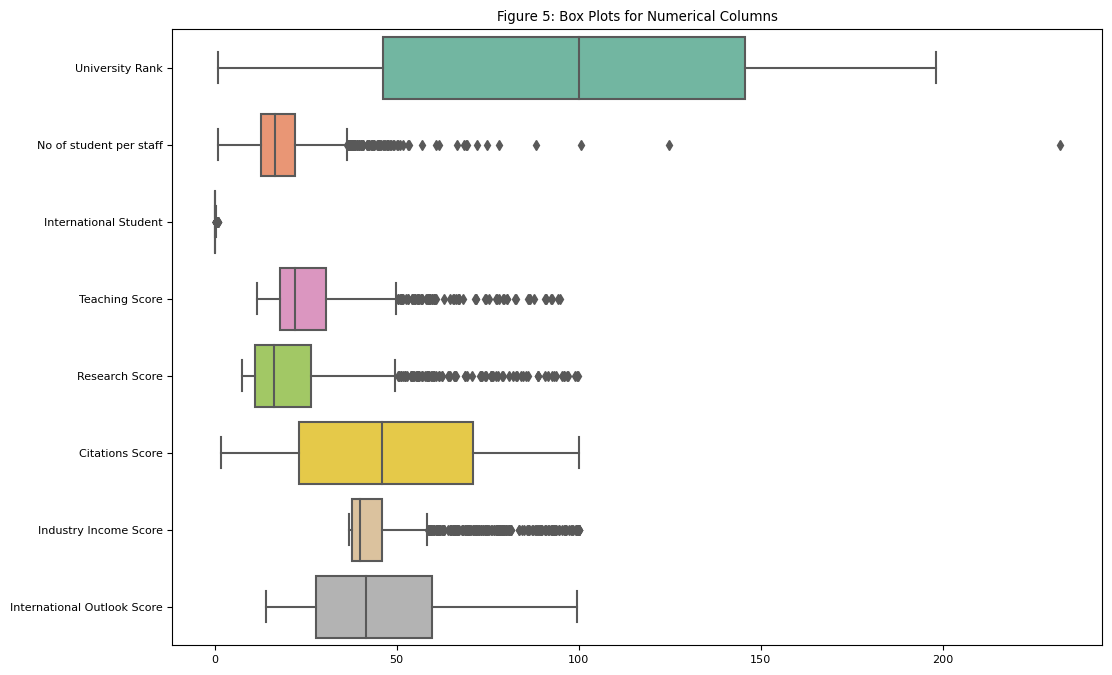

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
data_valid.info()

# Summary statistics for numerical columns
data_valid.describe()

# Unique values in categorical columns
for column in data_valid.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {data_valid[column].nunique()}")

# Check for duplicate rows
duplicate_rows = data_valid[data_valid.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Plot box plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']), orient="h", palette="Set2")
plt.title('Figure 5: Box Plots for Numerical Columns')
plt.show()

C:\Users\86188\AppData\Local\Temp\ipykernel_23928\3881388765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_valid.corr()


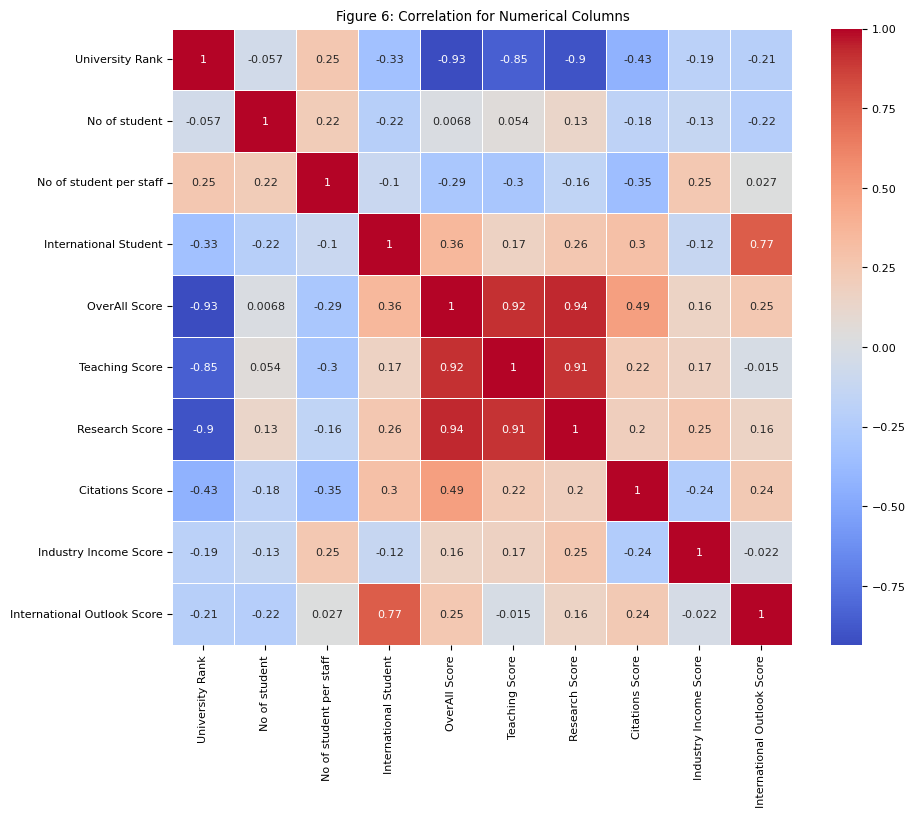

In [18]:
corr_matrix = data_valid.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Figure 6: Correlation for Numerical Columns')
plt.show()

## IV Relevancy of the dataset

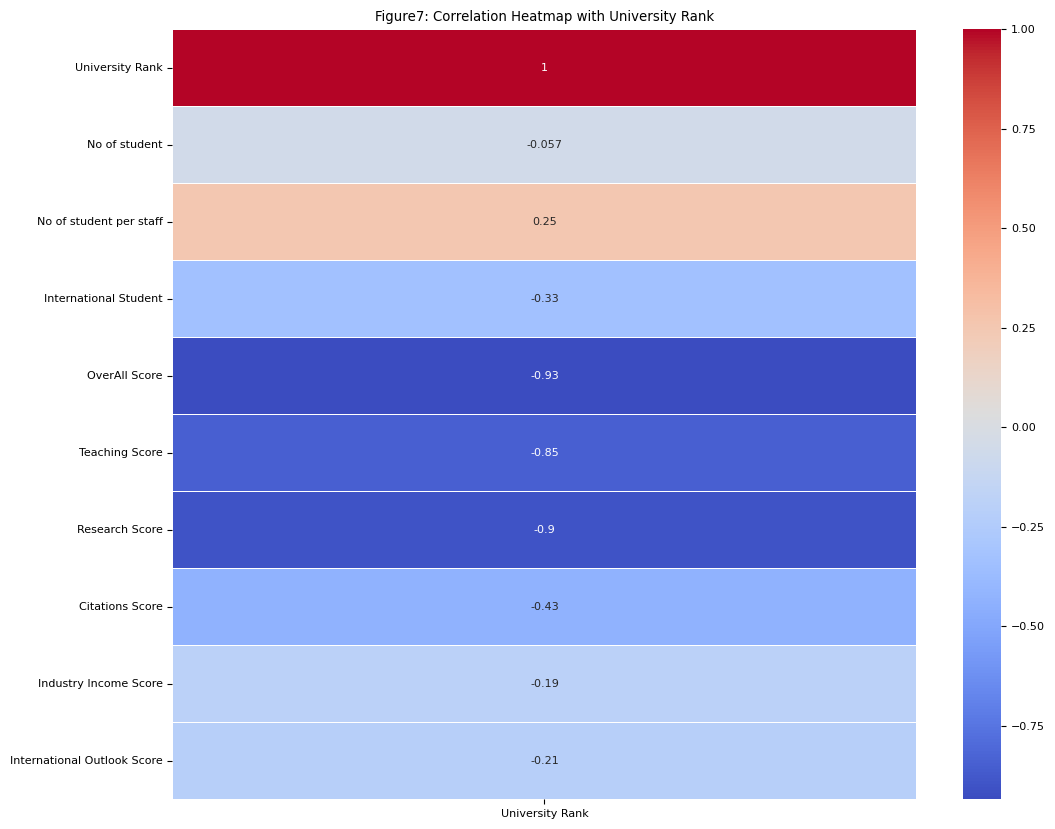

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data_valid'
numeric_columns = data_valid.select_dtypes(include=['float', 'int']).columns
corr_matrix = data_valid[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['University Rank']], annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Figure7: Correlation Heatmap with University Rank')
plt.show()

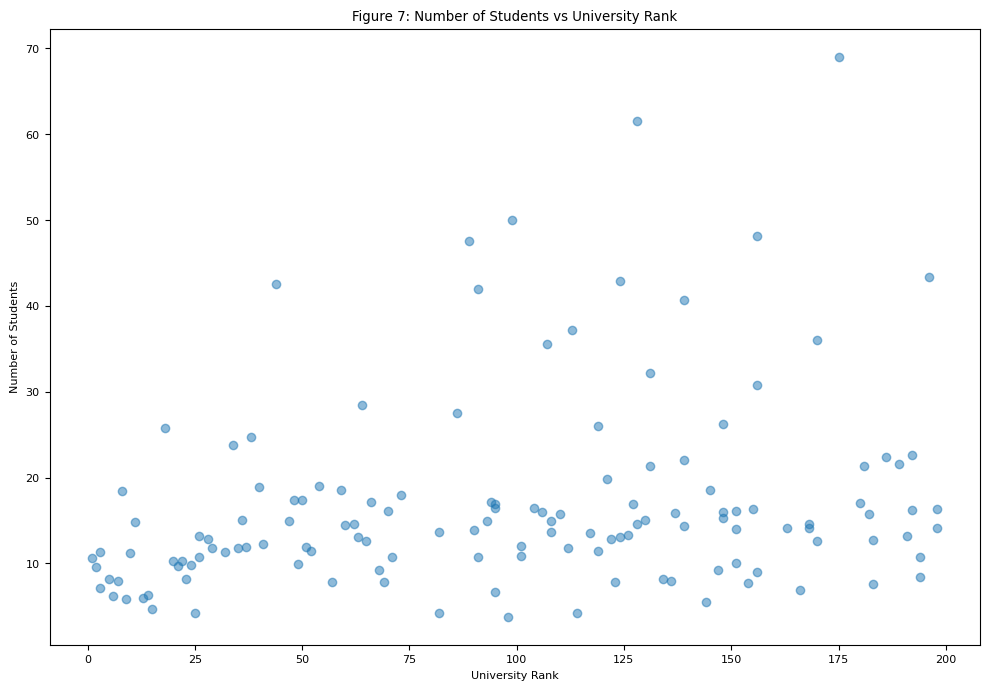

In [20]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data_valid'

plt.figure(figsize=(12, 8))
plt.scatter(data_valid['University Rank'], data_valid['No of student per staff'], alpha=0.5)
plt.title('Figure 7: Number of Students vs University Rank')
plt.xlabel('University Rank')
plt.ylabel('Number of Students')
plt.show()

# Part B: Predication Model Build and Evaluation

## I Training & Testing Data Preparation

In [21]:
# Check the new data types 'data_valid'
print(data_valid.dtypes)

University Rank                float64
Name of University              object
Location                        object
No of student                    int32
No of student per staff        float64
International Student          float64
Female:Male Ratio               object
OverAll Score                  float64
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object


In [22]:
data_valid

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1.0,University of Oxford,United Kingdom,20965,10.6,0.42,48:52:00,96.4,92.3,99.7,99.0,74.9,96.2
1,2.0,Harvard University,United States,21887,9.6,0.25,50:50:00,95.2,94.8,99.0,99.3,49.5,80.5
2,3.0,University of Cambridge,United Kingdom,20185,11.3,0.39,47:53:00,94.8,90.9,99.5,97.0,54.2,95.8
3,3.0,Stanford University,United States,16164,7.1,0.24,46:54:00,94.8,94.2,96.7,99.8,65.0,79.8
4,5.0,Massachusetts Institute of Technology,United States,11415,8.2,0.33,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,194.0,Medical University of Vienna,Austria,7274,8.4,0.33,50:50:00,54.6,35.0,27.6,94.0,61.2,81.7
193,194.0,University of Miami,United States,17009,10.8,0.16,53:47:00,54.6,48.4,33.5,81.0,48.3,60.2
194,196.0,University of Erlangen-Nuremberg,Germany,30303,43.4,0.13,51:49:00,54.5,44.6,47.5,68.8,90.7,53.5
196,198.0,Durham University,United Kingdom,18425,14.1,0.35,54:46:00,54.4,40.0,44.6,70.0,39.4,94.3


In [23]:
df_X = data_valid.drop(columns=['OverAll Score'])
df_y = data_valid[['OverAll Score']]
df_X.columns

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'No of student per staff', 'International Student', 'Female:Male Ratio',
       'Teaching Score', 'Research Score', 'Citations Score',
       'Industry Income Score', 'International Outlook Score'],
      dtype='object')

In [24]:
df_y.columns

Index(['OverAll Score'], dtype='object')

In [25]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression

# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [26]:
# 75% is for training and 25% is for testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = 0.25,
                                                    random_state=123)

In [27]:
# a very simple baseline: use the median value as the prediction results
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
print('Baseline on test data, MAE is %0.2f' %  baseline_mae)  
print('Baseline on test data, RMSE is %0.2f' %  baseline_rmse)   

Baseline on test data, MAE is 11.01
Baseline on test data, RMSE is 14.51


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [28]:
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
       'Industry Income Score', 'International Outlook Score']]

In [29]:
feature_train.head()

,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
23,74.2,84.0,95.0,44.6,74.7
106,48.6,60.1,77.8,80.0,63.9
27,65.4,81.8,98.7,55.2,80.1
9,82.8,90.8,98.3,59.8,97.5
178,45.8,47.0,78.7,52.1,41.3


In [30]:
feature_train

,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
23,74.2,84.0,95.0,44.6,74.7
106,48.6,60.1,77.8,80.0,63.9
27,65.4,81.8,98.7,55.2,80.1
9,82.8,90.8,98.3,59.8,97.5
178,45.8,47.0,78.7,52.1,41.3
...,...,...,...,...,...
21,74.5,85.4,97.9,44.5,96.7
141,40.7,45.2,87.8,79.4,57.3
97,49.5,47.5,96.5,66.7,50.6
184,32.6,39.4,91.5,46.2,68.9


## II linear Regression Model

In [31]:
lr = LinearRegression()
lr.fit(feature_train, y_train)

LinearRegression()

In [32]:
# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating and training a linear regression model
lr = LinearRegression()
lr.fit(feature_train, y_train)

# Making predictions on the training data
train_predictions = lr.predict(feature_train)

# Calculating and printing evaluation metrics for training data
train_mae = np.mean(abs(train_predictions - y_train))
train_rmse = np.sqrt(np.mean((train_predictions - y_train) ** 2))

print('Using Linear Regression, MAE on training data is %0.2f' % train_mae)
print('Using Linear Regression, RMSE on training data is %0.2f' % train_rmse)

# Selecting features for testing
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Making predictions on the testing data
test_predictions = lr.predict(feature_test)

# Calculating and printing evaluation metrics for testing data
mae = np.mean(abs(test_predictions - y_test))
rmse = np.sqrt(np.mean((test_predictions - y_test) ** 2))

print('Using Linear Regression, MAE on testing data is %0.2f' % mae)
print('Using Linear Regression, RMSE on testing data is %0.2f' % rmse)

# Printing model coefficients
print('w0 (Intercept):', lr.intercept_)
print('w1, w2, w3, w4, w5 (Coefficients):', lr.coef_)


Using Linear Regression, MAE on training data is 0.03
Using Linear Regression, RMSE on training data is 0.03
Using Linear Regression, MAE on testing data is 0.03
Using Linear Regression, RMSE on testing data is 0.03
w0 (Intercept): [0.00411922]
w1, w2, w3, w4, w5 (Coefficients): [[0.29937748 0.30049566 0.30025442 0.0248398  0.07488083]]


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\anaconda3\Lib\si

In [33]:
# Display the first few rows of the dataset as a table
display(data.head(5))

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1.0,University of Oxford,United Kingdom,20965,10.6,0.42,48:52:00,96.4,92.3,99.7,99.0,74.9,96.2
1,2.0,Harvard University,United States,21887,9.6,0.25,50:50:00,95.2,94.8,99.0,99.3,49.5,80.5
2,3.0,University of Cambridge,United Kingdom,20185,11.3,0.39,47:53:00,94.8,90.9,99.5,97.0,54.2,95.8
3,3.0,Stanford University,United States,16164,7.1,0.24,46:54:00,94.8,94.2,96.7,99.8,65.0,79.8
4,5.0,Massachusetts Institute of Technology,United States,11415,8.2,0.33,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [34]:
# we use back orginal dataset to apply Coefficients to find the OverAll Score for University of Oxford
# the predicted result greatly match the actual score

new_data = pd.DataFrame({
    'Teaching Score': [92.3],
    'Research Score': [99.7],
    'Citations Score': [99.0],
    'Industry Income Score': [74.9],
    'International Outlook Score': [96.2]
})
# Use the trained model to predict the new OverAll Score for University of Oxford
new_predictions = lr.predict(new_data)

# Round the predictions to one decimal place
rounded_predictions = np.round(new_predictions, 1)

print('Predicted OverAll Score for original Data for University of Oxford:')
print(rounded_predictions)


Predicted OverAll Score for original Data for University of Oxford:
[[96.4]]


In [35]:
#let say MIT is able to improve Teaching Score by 4 points next year
new_data = pd.DataFrame({
    'Teaching Score': [94.7],
    'Research Score': [93.6],
    'Citations Score': [99.8],
    'Industry Income Score': [90.9],
    'International Outlook Score': [89.3]
})
# Use the trained model to predict the new OverAll Score for MIT next year
new_predictions = lr.predict(new_data)

# Round the predictions to one decimal place
rounded_predictions = np.round(new_predictions, 1)

print('Predicted OverAll Score for MIT next year (2024):')
print(rounded_predictions)

# Thresholds for ranking interpretation
threshold_second_position = 95.2
threshold_first_position = 96.4

# Interpret the predicted ranking
if rounded_predictions == threshold_second_position:
    print('Higher chance to share the second position.')
elif rounded_predictions > threshold_second_position:
    print('Higher chance to place on the second position.')
    if rounded_predictions > threshold_first_position:
        print('Higher chance to place on the first position.')
else:
    print('The predicted score suggests a position below the second position.')

Predicted OverAll Score for MIT next year (2024):
[[95.4]]
Higher chance to place on the second position.


## III Lasso Model

In [36]:
from sklearn.linear_model import Lasso

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating and training a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(feature_train, y_train.values.ravel())  # Using .values.ravel() to avoid a warning

# Making predictions on the training data
train_predictions_lasso = lasso_model.predict(feature_train)

# Calculating and printing evaluation metrics for training data
train_mae_lasso = np.mean(abs(train_predictions_lasso - y_train.values.ravel()))
train_rmse_lasso = np.sqrt(np.mean((train_predictions_lasso - y_train.values.ravel()) ** 2))

print('Using Lasso Regression, MAE on training data is %0.2f' % train_mae_lasso)
print('Using Lasso Regression, RMSE on training data is %0.2f' % train_rmse_lasso)

# Selecting features for testing
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Making predictions on the testing data
test_predictions_lasso = lasso_model.predict(feature_test)

# Calculating and printing evaluation metrics for testing data
mae_lasso = np.mean(abs(test_predictions_lasso - y_test.values.ravel()))
rmse_lasso = np.sqrt(np.mean((test_predictions_lasso - y_test.values.ravel()) ** 2))

print('Using Lasso Regression, MAE on testing data is %0.2f' % mae_lasso)
print('Using Lasso Regression, RMSE on testing data is %0.2f' % rmse_lasso)

# Printing model coefficients
print('Intercept (Intercept):', lasso_model.intercept_)
print('Coefficients (w1, w2, w3, w4, w5):', lasso_model.coef_)

Using Lasso Regression, MAE on training data is 0.12
Using Lasso Regression, RMSE on training data is 0.15
Using Lasso Regression, MAE on testing data is 0.16
Using Lasso Regression, RMSE on testing data is 0.20
Intercept (Intercept): 1.4712041410892311
Coefficients (w1, w2, w3, w4, w5): [0.28942641 0.30768022 0.29111317 0.01983585 0.07134353]


In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating a Lasso model
lasso_model = Lasso()

# Defining a range of alpha values to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Setting up GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(feature_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model
best_lasso_model = grid_search.best_estimator_

# Making predictions on the testing data
test_predictions_lasso = best_lasso_model.predict(feature_test)

# Calculating and printing evaluation metrics for training data
train_mae_lasso = np.mean(abs(train_predictions_lasso - y_train.values.ravel()))
train_rmse_lasso = np.sqrt(np.mean((train_predictions_lasso - y_train.values.ravel()) ** 2))

print('Using Optimized Lasso Regression, MAE on training data is %0.2f' % train_mae_lasso)
print('Using Optimized Lasso Regression, RMSE on training data is %0.2f' % train_rmse_lasso)

# Calculating and printing evaluation metrics for testing data
mae_opt_lasso = np.mean(abs(test_predictions_lasso - y_test.values.ravel()))
rmse_opt_lasso = np.sqrt(np.mean((test_predictions_lasso - y_test.values.ravel()) ** 2))

print('Using Optimized Lasso Regression, MAE on testing data is %0.2f' % mae_opt_lasso)
print('Using Optimized Lasso Regression, RMSE on testing data is %0.2f' % rmse_opt_lasso)

# Printing model coefficients
print('Intercept (Intercept):', best_lasso_model.intercept_)
print('Coefficients (w1, w2, w3, w4, w5):', best_lasso_model.coef_)

Best Hyperparameters: {'alpha': 0.01}
Using Optimized Lasso Regression, MAE on training data is 0.12
Using Optimized Lasso Regression, RMSE on training data is 0.15
Using Optimized Lasso Regression, MAE on testing data is 0.03
Using Optimized Lasso Regression, RMSE on testing data is 0.03
Intercept (Intercept): 0.015758541847318952
Coefficients (w1, w2, w3, w4, w5): [0.29943476 0.30043701 0.30015686 0.02480302 0.0748725 ]


The lasso model is the specific form of linear regression with the regulation penalty, which means to simply the model in case it is overfit. In our case, we have adjusted the alpha rate, which controls the function of the regulation penalty. We found that the smaller alpha, the lower errors are. That being said, our model is simple enough and the normal linear regression intends to bring out the lowest MAE and RMSE.

## IV SVR Model

In [38]:
from sklearn.svm import SVR

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating and training a Support Vector Machine regression model
svm_model = SVR()
svm_model.fit(feature_train, y_train.values.ravel())  # Using .values.ravel() to avoid a warning

# Making predictions on the training data
train_predictions_svm = svm_model.predict(feature_train)

# Calculating and printing evaluation metrics for training data
train_mae_svm = np.mean(abs(train_predictions_svm - y_train.values.ravel()))
train_rmse_svm = np.sqrt(np.mean((train_predictions_svm - y_train.values.ravel()) ** 2))

print('Using Support Vector Machine, MAE on training data is %0.2f' % train_mae_svm)
print('Using Support Vector Machine, RMSE on training data is %0.2f' % train_rmse_svm)

# Selecting features for testing
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Making predictions on the testing data
test_predictions_svm = svm_model.predict(feature_test)

# Calculating and printing evaluation metrics for testing data
mae_svm = np.mean(abs(test_predictions_svm - y_test.values.ravel()))
rmse_svm = np.sqrt(np.mean((test_predictions_svm - y_test.values.ravel()) ** 2))

print('Using Support Vector Machine, MAE on testing data is %0.2f' % mae_svm)
print('Using Support Vector Machine, RMSE on testing data is %0.2f' % rmse_svm)

Using Support Vector Machine, MAE on training data is 2.39
Using Support Vector Machine, RMSE on training data is 3.96
Using Support Vector Machine, MAE on testing data is 4.10
Using Support Vector Machine, RMSE on testing data is 6.35


In [39]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [150, 300, 450, 600], 'epsilon': [0, 0.0001, 0.001]}
grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(feature_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model
best_svm_model = grid_search.best_estimator_

# Making predictions on the testing data using the best model
test_predictions_svm = best_svm_model.predict(feature_test)

# Calculating and printing evaluation metrics for training data
train_predictions_svm = best_svm_model.predict(feature_train)
train_mae_svm = np.mean(abs(train_predictions_svm - y_train.values.ravel()))
train_rmse_svm = np.sqrt(np.mean((train_predictions_svm - y_train.values.ravel()) ** 2))

print('Using Optimized Support Vector Machine, MAE on training data is %0.2f' % train_mae_svm)
print('Using Optimized Support Vector Machine, RMSE on training data is %0.2f' % train_rmse_svm)

# Calculating and printing evaluation metrics for testing data
mae_opt_svm = np.mean(abs(test_predictions_svm - y_test.values.ravel()))
rmse_opt_svm = np.sqrt(np.mean((test_predictions_svm - y_test.values.ravel()) ** 2))

print('Using Optimized Support Vector Machine, MAE on testing data is %0.2f' % mae_opt_svm)
print('Using Optimized Support Vector Machine, RMSE on testing data is %0.2f' % rmse_opt_svm)

Best Hyperparameters: {'C': 600, 'epsilon': 0}
Using Optimized Support Vector Machine, MAE on training data is 0.00
Using Optimized Support Vector Machine, RMSE on training data is 0.00
Using Optimized Support Vector Machine, MAE on testing data is 0.37
Using Optimized Support Vector Machine, RMSE on testing data is 0.60


This hyperparameters adjustment considers the factors of "C" and epsilon. Higher "C" generates the smaller-margin hyperline, which allows us to find the hyperline better represent the trend. Epsilon means the penalty associated with errors. Lower epsilon means the lower tolerance of errors. In this sense, the error of predictions greatly decrease and the MAE & RMSE of testing data reaches "0". We also believe the MAE & RMSE will continue to decrease according to our several attempts.

## V KNeighbors Regression Model

In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating and training a K-Nearest Neighbors regression model
knn_model = KNeighborsRegressor()
knn_model.fit(feature_train, y_train.values.ravel())  # Using .values.ravel() to avoid a warning

# Making predictions on the training data
train_predictions_knn = knn_model.predict(feature_train)

# Calculating and printing evaluation metrics for training data
train_mae_knn = np.mean(abs(train_predictions_knn - y_train.values.ravel()))
train_rmse_knn = np.sqrt(np.mean((train_predictions_knn - y_train.values.ravel()) ** 2))

print('Using K-Nearest Neighbors, MAE on training data is %0.2f' % train_mae_knn)
print('Using K-Nearest Neighbors, RMSE on training data is %0.2f' % train_rmse_knn)

# Selecting features for testing
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Making predictions on the testing data
test_predictions_knn = knn_model.predict(feature_test)

# Calculating and printing evaluation metrics for testing data
mae_knn = np.mean(abs(test_predictions_knn - y_test.values.ravel()))
rmse_knn = np.sqrt(np.mean((test_predictions_knn - y_test.values.ravel()) ** 2))

print('Using K-Nearest Neighbors, MAE on testing data is %0.2f' % mae_knn)
print('Using K-Nearest Neighbors, RMSE on testing data is %0.2f' % rmse_knn)

Using K-Nearest Neighbors, MAE on training data is 1.60
Using K-Nearest Neighbors, RMSE on training data is 2.11
Using K-Nearest Neighbors, MAE on testing data is 2.31
Using K-Nearest Neighbors, RMSE on testing data is 2.69


In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Scale the features
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)

# Creating and training a K-Nearest Neighbors regression model
knn_model = KNeighborsRegressor()
knn_model.fit(feature_train_scaled, y_train.values.ravel())

# Making predictions on the training data
train_predictions_knn = knn_model.predict(feature_train_scaled)

# Calculating and printing evaluation metrics for training data
train_mae_knn = np.mean(abs(train_predictions_knn - y_train.values.ravel()))
train_rmse_knn = np.sqrt(np.mean((train_predictions_knn - y_train.values.ravel()) ** 2))

print('Using K-Nearest Neighbors, MAE on training data is %0.2f' % train_mae_knn)
print('Using K-Nearest Neighbors, RMSE on training data is %0.2f' % train_rmse_knn)

# Making predictions on the testing data
test_predictions_knn = knn_model.predict(feature_test_scaled)

# Calculating and printing evaluation metrics for testing data
mae_knn = np.mean(abs(test_predictions_knn - y_test.values.ravel()))
rmse_knn = np.sqrt(np.mean((test_predictions_knn - y_test.values.ravel()) ** 2))

print('Using K-Nearest Neighbors, MAE on testing data is %0.2f' % mae_knn)
print('Using K-Nearest Neighbors, RMSE on testing data is %0.2f' % rmse_knn)

Using K-Nearest Neighbors, MAE on training data is 1.57
Using K-Nearest Neighbors, RMSE on training data is 2.07
Using K-Nearest Neighbors, MAE on testing data is 1.99
Using K-Nearest Neighbors, RMSE on testing data is 2.49


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Assume X_train, X_test, y_train, y_test are already defined

# Define custom feature ranges
custom_ranges = {
    'Teaching Score': (0, 92),
    'Research Score': (0, 94),
    'Citations Score': (0, 49),
    'Industry Income Score': (0, 16),
    'International Outlook Score': (0, 25)
}

# Create MinMaxScaler for each feature with custom ranges
scalers = {feature: MinMaxScaler(feature_range=range_) for feature, range_ in custom_ranges.items()}

# Fit and transform the training features
feature_train_scaled = pd.DataFrame({feature: scalers[feature].fit_transform(X_train[[feature]]).ravel()
                                     for feature in custom_ranges})

# Transform the testing features using the same scalers
feature_test_scaled = pd.DataFrame({feature: scalers[feature].transform(X_test[[feature]]).ravel()
                                    for feature in custom_ranges})

# Selecting features for training
feature_train = feature_train_scaled[['Teaching Score', 'Research Score', 'Citations Score',
                                      'Industry Income Score', 'International Outlook Score']]

# Creating and training a Random Forest regression model
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(feature_train, y_train.values.ravel())

# Making predictions on the testing data
test_predictions_rf = rf_model.predict(feature_test_scaled)

# Calculating and printing evaluation metrics for training data
train_mae_knn = np.mean(abs(train_predictions_knn - y_train.values.ravel()))
train_rmse_knn = np.sqrt(np.mean((train_predictions_knn - y_train.values.ravel()) ** 2))

print('Using K-Nearest Neighbors, MAE on training data is %0.2f' % train_mae_knn)
print('Using K-Nearest Neighbors, RMSE on training data is %0.2f' % train_rmse_knn)

# Calculating and printing evaluation metrics for testing data
mae_opt_knn = mean_absolute_error(y_test, test_predictions_rf)
rmse_opt_knn = np.sqrt(mean_squared_error(y_test, test_predictions_rf))

print('Using Random Forest with MinMaxScaler, MAE on testing data is %0.2f' % mae_opt_knn)
print('Using Random Forest with MinMaxScaler, RMSE on testing data is %0.2f' % rmse_opt_knn)

Using K-Nearest Neighbors, MAE on training data is 1.57
Using K-Nearest Neighbors, RMSE on training data is 2.07
Using Random Forest with MinMaxScaler, MAE on testing data is 1.57
Using Random Forest with MinMaxScaler, RMSE on testing data is 1.98


KNN model uses the average (or weighted average) value of the nearest data points as the prediction, so the prediction is affected by the weight of the features. We have tried either standard scale or customized scale (based on the correlation to the overall score) to make predictions. We manage to reduce the MAE & RMSE mostly by the customized scale, although the errors rates are still high for both training and testing data. This implies that this model might fit the prediction of our model as each target data value is different, so using the average value of the nearest points as the prediction cannot effectively predict the actual value in either training or testing data.

## VI Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating and training a Decision Tree regression model with a specified max_depth
max_depth_value = 8  
dt_model = DecisionTreeRegressor(max_depth=max_depth_value, random_state=123)
dt_model.fit(feature_train, y_train.values.ravel())

# Making predictions on the training data
train_predictions_dt = dt_model.predict(feature_train)

# Calculating and printing evaluation metrics for training data
train_mae_dt = np.mean(abs(train_predictions_dt - y_train.values.ravel()))
train_rmse_dt = np.sqrt(np.mean((train_predictions_dt - y_train.values.ravel()) ** 2))

print(f'Using Decision Tree (max_depth={max_depth_value}), MAE on training data is {train_mae_dt:.2f}')
print(f'Using Decision Tree (max_depth={max_depth_value}), RMSE on training data is {train_rmse_dt:.2f}')

# Selecting features for testing
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Making predictions on the testing data
test_predictions_dt = dt_model.predict(feature_test)

# Calculating and printing evaluation metrics for testing data
mae_dt = np.mean(abs(test_predictions_dt - y_test.values.ravel()))
rmse_dt = np.sqrt(np.mean((test_predictions_dt - y_test.values.ravel()) ** 2))

print(f'Using Decision Tree (max_depth={max_depth_value}), MAE on testing data is {mae_dt:.2f}')
print(f'Using Decision Tree (max_depth={max_depth_value}), RMSE on testing data is {rmse_dt:.2f}')

Using Decision Tree (max_depth=8), MAE on training data is 0.17
Using Decision Tree (max_depth=8), RMSE on training data is 0.40
Using Decision Tree (max_depth=8), MAE on testing data is 1.91
Using Decision Tree (max_depth=8), RMSE on testing data is 2.50


In [44]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [8, 9, 10],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=123), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(feature_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model
best_dt_model = grid_search.best_estimator_

# Making predictions on the testing data
test_predictions_best_dt = best_dt_model.predict(feature_test)

# Calculating and printing evaluation metrics for training data
train_mae_dt = np.mean(abs(train_predictions_dt - y_train.values.ravel()))
train_rmse_dt = np.sqrt(np.mean((train_predictions_dt - y_train.values.ravel()) ** 2))

print(f'Using Decision Tree (max_depth={max_depth_value}), MAE on training data is {train_mae_dt:.2f}')
print(f'Using Decision Tree (max_depth={max_depth_value}), RMSE on training data is {train_rmse_dt:.2f}')

# Calculating and printing evaluation metrics for testing data
mae_opt_dt = np.mean(abs(test_predictions_best_dt - y_test.values.ravel()))
rmse_opt_dt = np.sqrt(np.mean((test_predictions_best_dt - y_test.values.ravel()) ** 2))

print(f'Using Best Decision Tree, MAE on testing data is {mae_opt_dt:.2f}')
print(f'Using Best Decision Tree, RMSE on testing data is {rmse_opt_dt:.2f}')

Best Hyperparameters: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Using Decision Tree (max_depth=8), MAE on training data is 0.17
Using Decision Tree (max_depth=8), RMSE on training data is 0.40
Using Best Decision Tree, MAE on testing data is 1.97
Using Best Decision Tree, RMSE on testing data is 2.48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

The hyperparameters adjustment considers the maximum decision tree level, minimum sample splits, minimum sample leaf, and maximum features. With several trails of adjustment, we manage to find the combination of {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2} to achieve the low errors. However, without defining maximum features, minimum sample leaf or mini sample splits, the maximum depth of 8 brings out the lower error of MAE in testing data. In general, the MAE & RMSE of training data are lower while the results for training data are high. The same explanation is that all label target values of our data set are different, and the decision tree model use only the value from the training data set as the final prediction. Hence, the errors for testing data are high in both MAE and RMSE.

## VII Random Forest Regression Model

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating and training a Random Forest regression model
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(feature_train, y_train.values.ravel())  # Using .values.ravel() to avoid a warning

# Making predictions on the training data
train_predictions_rf = rf_model.predict(feature_train)

# Calculating and printing evaluation metrics for training data
train_mae_rf = np.mean(abs(train_predictions_rf - y_train.values.ravel()))
train_rmse_rf = np.sqrt(np.mean((train_predictions_rf - y_train.values.ravel()) ** 2))

print('Using Random Forest, MAE on training data is %0.2f' % train_mae_rf)
print('Using Random Forest, RMSE on training data is %0.2f' % train_rmse_rf)

# Selecting features for testing
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Making predictions on the testing data
test_predictions_rf = rf_model.predict(feature_test)

# Calculating and printing evaluation metrics for testing data
mae_rf = np.mean(abs(test_predictions_rf - y_test.values.ravel()))
rmse_rf = np.sqrt(np.mean((test_predictions_rf - y_test.values.ravel()) ** 2))

print('Using Random Forest, MAE on testing data is %0.2f' % mae_rf)
print('Using Random Forest, RMSE on testing data is %0.2f' % rmse_rf)

Using Random Forest, MAE on training data is 0.60
Using Random Forest, RMSE on training data is 0.79
Using Random Forest, MAE on testing data is 1.57
Using Random Forest, RMSE on testing data is 1.99


In [46]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [43, 44, 45],
    'max_depth': [8, 9, 10],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [0, 1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=123), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model to the data
grid_search.fit(feature_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
test_predictions_best_rf = best_rf_model.predict(feature_test)

# Calculating and printing evaluation metrics for training data
train_mae_rf = np.mean(abs(train_predictions_rf - y_train.values.ravel()))
train_rmse_rf = np.sqrt(np.mean((train_predictions_rf - y_train.values.ravel()) ** 2))

print('Using Optimized Random Forest, MAE on training data is %0.2f' % train_mae_rf)
print('Using Optimized Random Forest, RMSE on training data is %0.2f' % train_rmse_rf)

# Calculate and print evaluation metrics for testing data
mae_opt_rf = np.mean(abs(test_predictions_best_rf - y_test.values.ravel()))
rmse_opt_rf = np.sqrt(np.mean((test_predictions_best_rf - y_test.values.ravel()) ** 2))

print('Using Optimized Random Forest, MAE on testing data is %0.2f' % mae_opt_rf)
print('Using Optimized Random Forest, RMSE on testing data is %0.2f' % rmse_opt_rf)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 44}
Using Optimized Random Forest, MAE on training data is 0.60
Using Optimized Random Forest, RMSE on training data is 0.79
Using Optimized Random Forest, MAE on testing data is 1.56
Using Optimized Random Forest, RMSE on testing data is 1.99


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

This hyperparameters adjustment considers the four factors: number of decision trees, maximum decision tree depths, minimum sample splits, and mimimum sample leaf. After several trails of attempt, we found the combination of {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 44} can achieve the higher prediction and reduce the MAE error of testing data by addressing issues like overfitting, although the effect is not so obvious. Our assumption is that the university ranking data strictly follow linear relationship from low to high. In other words, each label data has different value. Decision model can only cover the label data in the training dataset, so the error is lower. In contrast, the target label value of the testing dataset are not included at all, so the error is high and almost impossible to reduce. 

## VIII Gradient Boosting Regression Model

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# Selecting features for training
feature_train = X_train[['Teaching Score', 'Research Score', 'Citations Score',
                         'Industry Income Score', 'International Outlook Score']]

# Creating and training a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(random_state=123)
gb_model.fit(feature_train, y_train.values.ravel())  # Using .values.ravel() to avoid a warning

# Making predictions on the training data
train_predictions_gb = gb_model.predict(feature_train)

# Calculating and printing evaluation metrics for training data
train_mae_gb = np.mean(abs(train_predictions_gb - y_train.values.ravel()))
train_rmse_gb = np.sqrt(np.mean((train_predictions_gb - y_train.values.ravel()) ** 2))

print('Using Gradient Boosting, MAE on training data is %0.2f' % train_mae_gb)
print('Using Gradient Boosting, RMSE on training data is %0.2f' % train_rmse_gb)

# Selecting features for testing
feature_test = X_test[['Teaching Score', 'Research Score', 'Citations Score',
                        'Industry Income Score', 'International Outlook Score']]

# Making predictions on the testing data
test_predictions_gb = gb_model.predict(feature_test)

# Calculating and printing evaluation metrics for testing data
mae_gb = np.mean(abs(test_predictions_gb - y_test.values.ravel()))
rmse_gb = np.sqrt(np.mean((test_predictions_gb - y_test.values.ravel()) ** 2))

print('Using Gradient Boosting, MAE on testing data is %0.2f' % mae_gb)
print('Using Gradient Boosting, RMSE on testing data is %0.2f' % rmse_gb)

Using Gradient Boosting, MAE on training data is 0.14
Using Gradient Boosting, RMSE on training data is 0.18
Using Gradient Boosting, MAE on testing data is 1.10
Using Gradient Boosting, RMSE on testing data is 1.50


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [2940, 2950],
    'learning_rate': [0.2],
    'max_depth': [1],
    'min_samples_split': [3],
    'min_samples_leaf': [2]
}

# Create the Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=123)

# Instantiate GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the grid search to the data
grid_search.fit(feature_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model
best_gb_model = grid_search.best_estimator_

# Making predictions on the testing data
test_predictions_gb = best_gb_model.predict(feature_test)

# Calculating and printing evaluation metrics for training data
train_mae_gb = np.mean(abs(train_predictions_gb - y_train.values.ravel()))
train_rmse_gb = np.sqrt(np.mean((train_predictions_gb - y_train.values.ravel()) ** 2))

print('Using Gradient Boosting, MAE on training data is %0.2f' % train_mae_gb)
print('Using Gradient Boosting, RMSE on training data is %0.2f' % train_rmse_gb)

# Calculating and printing evaluation metrics for testing data
mae_opt_gb = np.mean(abs(test_predictions_gb - y_test.values.ravel()))
rmse_opt_gb = np.sqrt(np.mean((test_predictions_gb - y_test.values.ravel()) ** 2))

print('Using Optimized Gradient Boosting, MAE on testing data is %0.2f' % mae_opt_gb)
print('Using Optimized Gradient Boosting, RMSE on testing data is %0.2f' % rmse_opt_gb)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 2940}
Using Gradient Boosting, MAE on training data is 0.14
Using Gradient Boosting, RMSE on training data is 0.18
Using Optimized Gradient Boosting, MAE on testing data is 1.02
Using Optimized Gradient Boosting, RMSE on testing data is 1.36


The hyperparameters adjustment includes the number of decision trees, maximum decision tree depths, minimum sample splits, mimimum sample leaf, and learning rate. Through several attempts, we realize that the combination of {'learning_rate': 0.2, 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 2940} can optimize the performance of this model.
Although decision tree model is not able to make accurate predictions for our dataset, the upgraded model of Random Forest and Gradient Boosting Regression effectively reduce the MAE and RMSE errors, especially the Gradient Boosting Regression. We believe this model focuses on learning from the wrong predictions, which reduce the MAE and RMSE errors while Random Forest does not have this function.

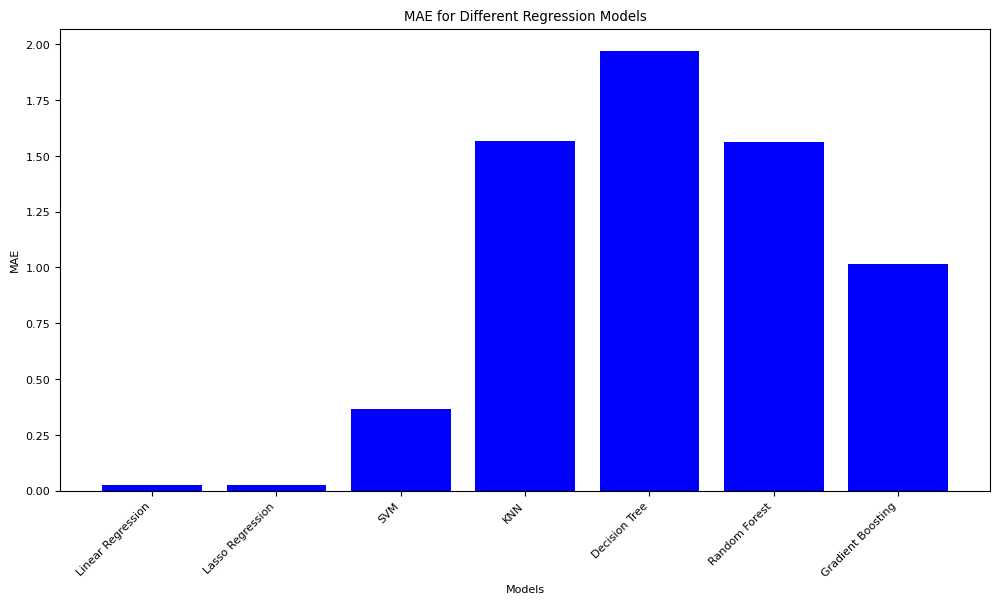

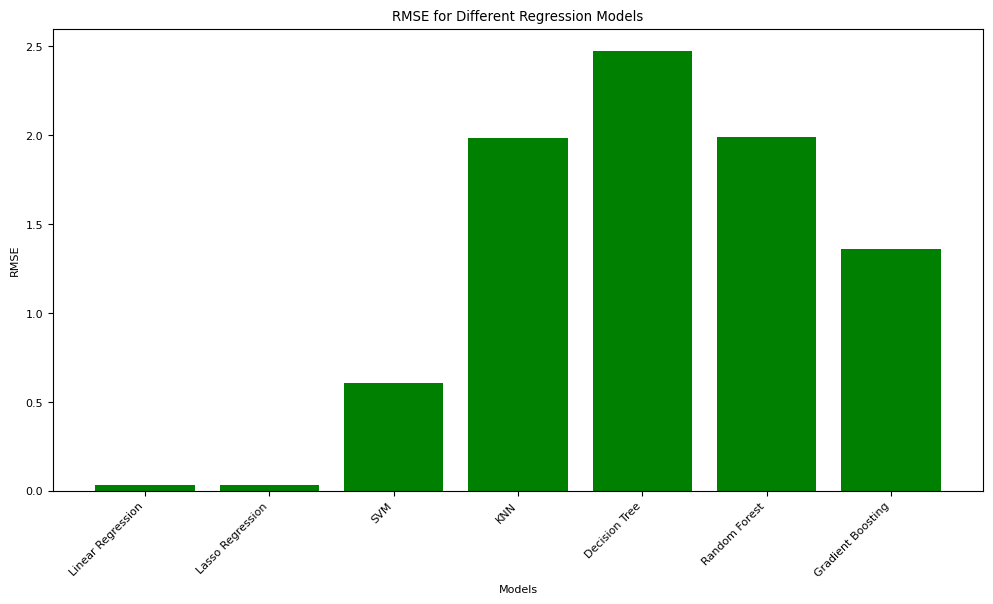

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Lasso Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Corresponding MAE and RMSE values for testing data
mae_values = [mae, mae_opt_lasso, mae_opt_svm, mae_opt_knn, mae_opt_dt, mae_opt_rf, mae_opt_gb]
rmse_values = [rmse, rmse_opt_lasso, rmse_opt_svm, rmse_opt_knn, rmse_opt_dt, rmse_opt_rf, rmse_opt_gb]

# Convert the values to numpy arrays
mae_values = np.array([float(val) for val in mae_values])
rmse_values = np.array([float(val) for val in rmse_values])

# Plotting MAE
plt.figure(figsize=(12, 6))
plt.bar(models, mae_values, color='blue')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting RMSE
plt.figure(figsize=(12, 6))
plt.bar(models, rmse_values, color='green')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.show()

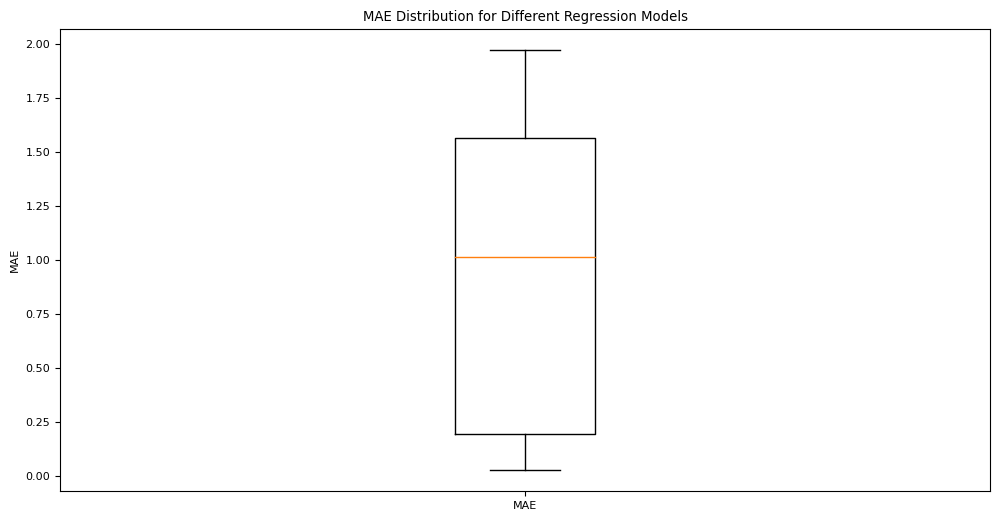

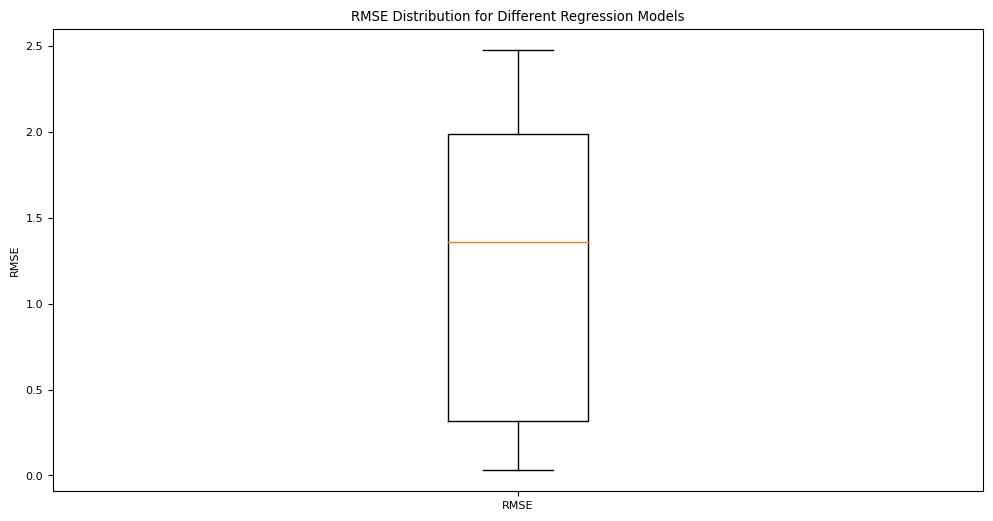

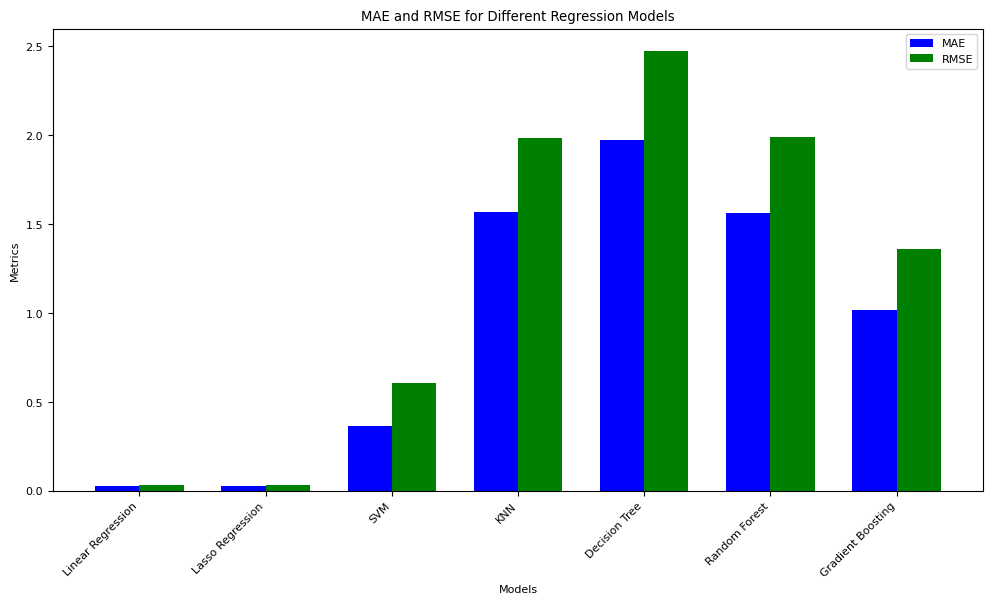

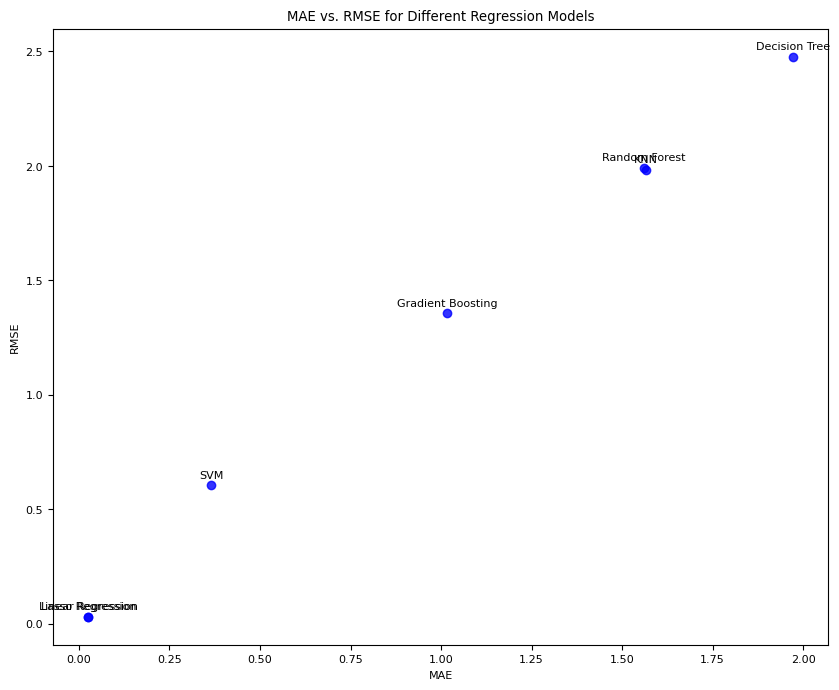

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Lasso Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Corresponding MAE and RMSE values for testing data
mae_values = [mae, mae_opt_lasso, mae_opt_svm, mae_opt_knn, mae_opt_dt, mae_opt_rf, mae_opt_gb]
rmse_values = [rmse, rmse_opt_lasso, rmse_opt_svm, rmse_opt_knn, rmse_opt_dt, rmse_opt_rf, rmse_opt_gb]

# Convert the values to numpy arrays
mae_values = np.array([float(val) for val in mae_values])
rmse_values = np.array([float(val) for val in rmse_values])

# Boxplot for MAE
plt.figure(figsize=(12, 6))
plt.boxplot([mae_values], labels=['MAE'])
plt.ylabel('MAE')
plt.title('MAE Distribution for Different Regression Models')
plt.show()

# Boxplot for RMSE
plt.figure(figsize=(12, 6))
plt.boxplot([rmse_values], labels=['RMSE'])
plt.ylabel('RMSE')
plt.title('RMSE Distribution for Different Regression Models')
plt.show()

# Side-by-Side Bar Plots for MAE and RMSE
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
plt.bar(index, mae_values, color='blue', width=bar_width, label='MAE')
plt.bar(index + bar_width, rmse_values, color='green', width=bar_width, label='RMSE')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('MAE and RMSE for Different Regression Models')
plt.xticks(index + bar_width/2, models, rotation=45, ha='right')
plt.legend()
plt.show()

# Scatter Plot for MAE vs. RMSE
plt.figure(figsize=(10, 8))
plt.scatter(mae_values, rmse_values, c='blue', marker='o', alpha=0.8)
plt.xlabel('MAE')
plt.ylabel('RMSE')
plt.title('MAE vs. RMSE for Different Regression Models')
for i, model in enumerate(models):
    plt.annotate(model, (mae_values[i], rmse_values[i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

In conclusion, based on the characteristic of our data, which is small size, simple, linear relationship, and different values of the target labels. The linear regression model or the SVR are the best models for our case. Lasso is not helpful in our dataset as the data is quite simple already. The KNN and decision tree models do not work so well because they use existing training data value as the predictions, although the Gradient Boosting Regression Model can reduce the MAE and RMSE errors because it focuses on learning from the wrong predictions.